Data Science 100 - Group Project (Individual Portion)

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#read in players data
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


This is the "players" dataset, which includes 196 rows, and 7 variables. These 7 variables include:

- experience &rarr; The expereince level of a player (Pro, Veteran, Beginner, Amateur, Regular)

- subscribe &rarr; Whether a player is subscribed or not (TRUE/FALSE) 

- hasedEmail &rarr; the email each player uses 

- played_hours &rarr; The number of hours played by each player 

- name &rarr; Each player's name 

- gender &rarr; Player's gender (Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say, Other) 

- Age &rarr; Player's age

From these seven variables, 4 are character (chr) variables (experience, hashedEmail, name, gender), 2 are numeric (dbl) varaibles (played_hours, age), and 1 is a logical (lgl) variable (subscribe)

After a closer analysis of the data, there are 2 main issues. The first issue is that several players seem to not play at all because their played_hours observation is 0.0. This is problematic because the time players spent playing is a crucial variable that can help us determine if the player enjoyes the game, if the game is boring or exciting (higher playing time probably means more excitment), and it can also help us identify the target audience of the game (the agae group with the highest playing time is possibly the target audience). The second issue is that some of teh players time spent playing is way too high compared to other times. For exmaple, there are 3 "outlier" played_time varaibles, which are 32.0, 30.3, and 48.4. This is problematic because this can cause bias or misclassification by classification models. 

The broad question I will adress is "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts." Since this question is intereted in players contributing to large amounts of data, I can try to determine the characteristic(s) of players who have the most playing time, since they are the ones that will contribute to lareg amounts of data. So I will specifically address the question, "Does age, gender, and experience predict played_hours in players dataset?". 

I will address my specific question by selecting the "age", "gender", "experience", and "played_hours" variables. I will then determine the three most popular "experience" levels and filter them. Finally, I will make a regression model, that will predict the "played_hours" based on a players age, experience, and gender. 

In [3]:
#select the required variables
players_2 <- players |>
            select(experience, gender, Age, played_hours)
players_2

experience,gender,Age,played_hours
<chr>,<chr>,<dbl>,<dbl>
Pro,Male,9,30.3
Veteran,Male,17,3.8
Veteran,Male,17,0.0
Amateur,Female,21,0.7
Regular,Male,21,0.1
Amateur,Female,17,0.0
Regular,Female,19,0.0
Amateur,Male,21,0.0
Amateur,Male,47,0.1


Above, we wrangled the data to include only the variables we are interested in, which are Age, experiece, played_hours, and gender. Additionally, our data is tidy because each column is a single variable, each row is a single observation, and each cell is a single value. 

In [4]:
#calculate the mean of the dbl variables (Age, played_hours)
players_specific <- players_2 |>
                    summarize(age_mean = mean(Age, na.rm = TRUE), played_hours_mean = mean(played_hours, na.rm = TRUE))
players_specific

age_mean,played_hours_mean
<dbl>,<dbl>
21.13918,5.845918


From the above wrangling, we can see that the average age of a player is 21, and that the avergae playing time is 5.85 hours. One thing to keep in mind is that, as discussed previously, some of the variables in the played_hours column were very high compared to the rest. Hence, we need to take this avergae with a grain of salt because the high numbers would make the overall average higher. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


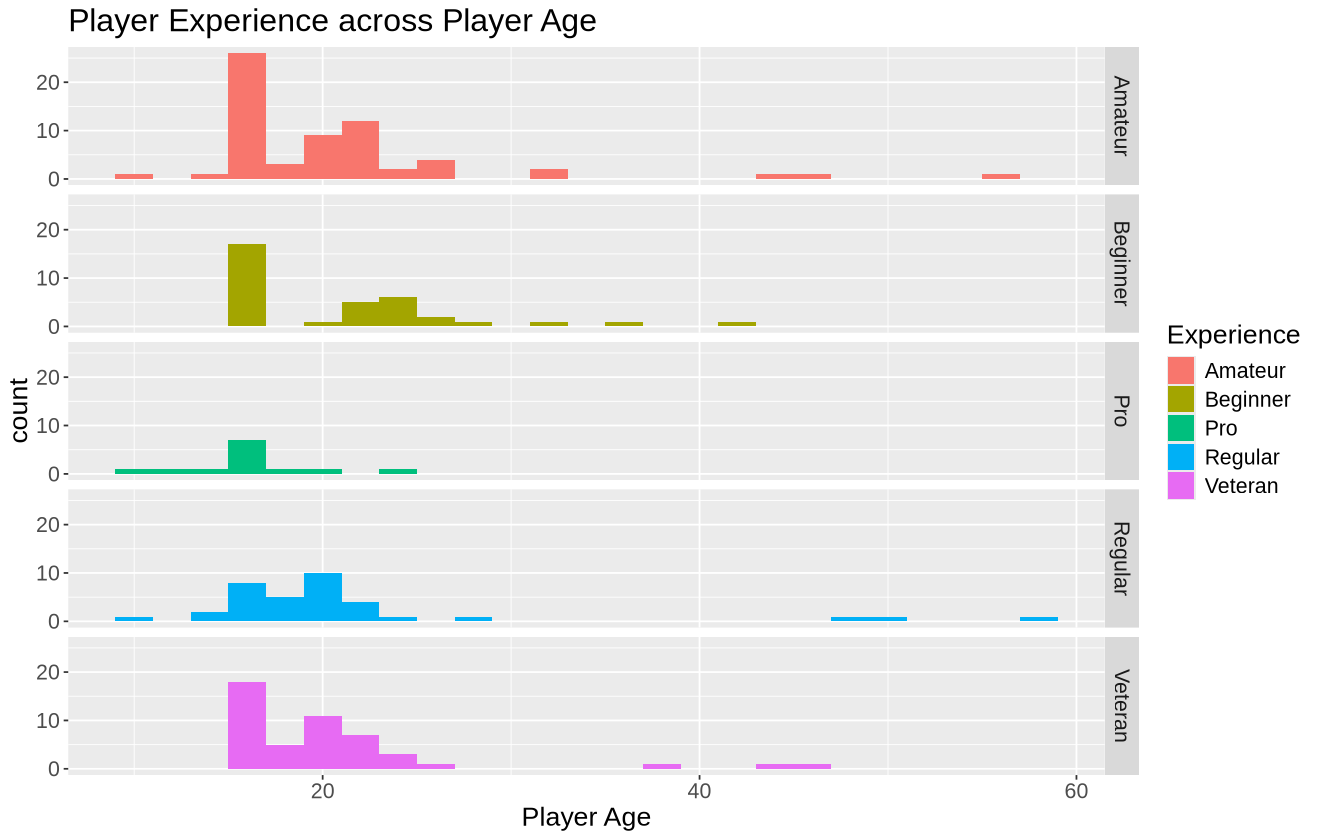

In [27]:
#make a histogram to see the experience of players in each age-group

options(repr.plot.width = 11, repr.plot.length = 15)

players_time_vs_age_plot <- players_2 |>
                            ggplot(aes(x = Age, fill = as.factor(experience)))+
                            geom_histogram(binwidth = 2, position = "identity")+
                            facet_grid(rows = vars(experience))+
                            labs(x = "Player Age", title = "Player Experience across Player Age", fill = "Experience")+
                            theme(text = element_text(size = 16))+
                            scale_color_brewer(palette = "Set2")

players_time_vs_age_plot

The above graph shows that most players are within 15-25 years of age, which matches the mean we calculated earlier. From the above graph we also see that most players are either amateurs, veterans, or beginners. This tells us that we can further specify our data to include players with amateur, beginner, or veteran experiences, which we can do using filter().

In [28]:
#filter data to include only veteran, amateur, and beginner player experience data
players_filtered <- players_2 |>
                    filter(experience == "Amateur" | experience == "Beginner" | experience == "Veteran")
players_filtered

experience,gender,Age,played_hours
<chr>,<chr>,<dbl>,<dbl>
Veteran,Male,17,3.8
Veteran,Male,17,0.0
Amateur,Female,21,0.7
Amateur,Female,17,0.0
Amateur,Male,21,0.0
Amateur,Male,47,0.1
Veteran,Female,22,0.0
Veteran,Female,23,1.6
Beginner,Female,25,1.5


We originally had 196 rows, but now we only have 146, which means that 50 players had either pro or regular experience. 